In [2]:
import pandas as pd

# Load the uploaded dataset
file_path = "datasets/dataset1.xlsx"

xls = pd.ExcelFile(file_path)
xls.sheet_names


['Sheet1']

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
df = pd.read_excel("datasets/dataset1.xlsx")


# Display cleaned dataset
df.head()


,Location,14/2/2025,15/2/2025,16/2/2025,17/2/2025,18/2/2025,26/2/2025,2025-07-03 00:00:00,2025-08-03 00:00:00,2025-09-03 00:00:00,2025-10-03 00:00:00,2025-11-03 00:00:00,2025-12-03 00:00:00
0,Shahdara,192,193,193,193,175,176.0,174,164,146,175.0,175,169.0
1,Town Hall,186,186,254,254,223,161.0,239,188,164,196.0,163,179.0
2,Egreton road,172,165,183,182,210,147.0,163,168,137,NaN,153,NaN
3,Punjab University,179,161,189,189,195,158.0,188,167,167,172.0,155,161.0
4,Canal Road,154,152,169,169,149,162.0,153,126,132,156.0,139,135.0


In [4]:
# Convert column names to string and standardize date format
df_clean = df.melt(id_vars=["Location"], var_name="Date", value_name="AQI")

# Convert date column to datetime format
df_clean["Date"] = pd.to_datetime(df_clean["Date"], errors='coerce')

# Drop rows with NaN dates (if any)
df_clean = df_clean.dropna(subset=["Date"])

# Sort values for better trend analysis
df_clean = df_clean.sort_values(by=["Location", "Date"])

# Display cleaned dataset
df_clean.head(20)


C:\Users\Saira Alvi\AppData\Local\Temp\ipykernel_2044\1017308395.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_clean["Date"] = pd.to_datetime(df_clean["Date"], errors='coerce')


,Location,Date,AQI
9,Barki Road,2025-02-14,172.0
25,Barki Road,2025-02-15,170.0
41,Barki Road,2025-02-16,195.0
57,Barki Road,2025-02-17,195.0
73,Barki Road,2025-02-18,187.0
89,Barki Road,2025-02-26,NaN
105,Barki Road,2025-07-03,174.0
121,Barki Road,2025-08-03,146.0
137,Barki Road,2025-09-03,139.0
153,Barki Road,2025-10-03,172.0


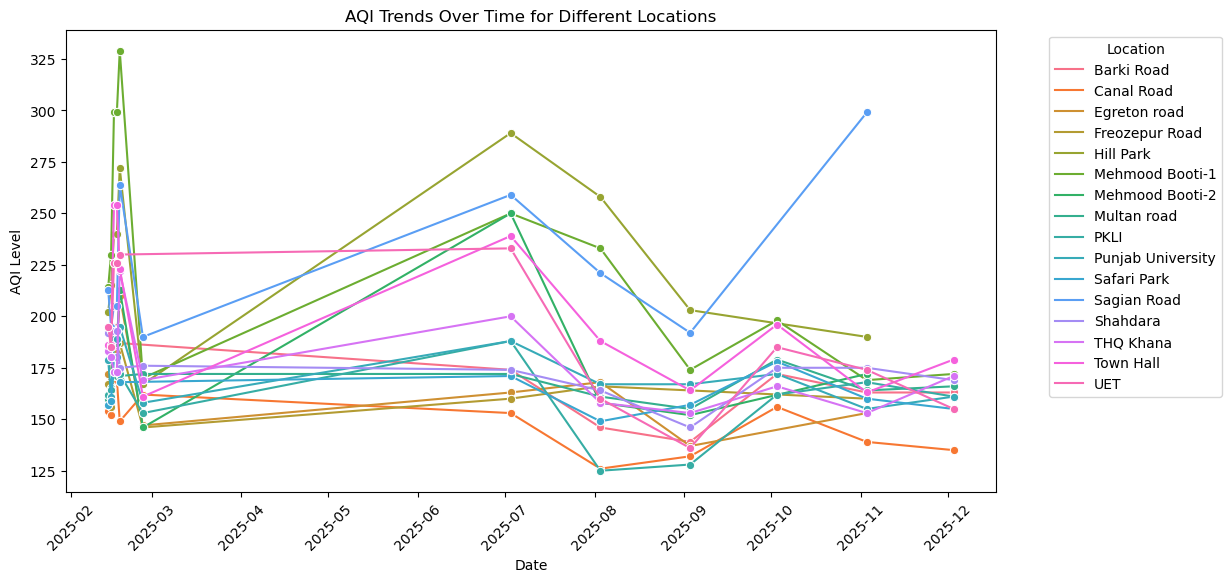

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_clean, x="Date", y="AQI", hue="Location", marker="o")

# Labels and title
plt.xlabel("Date")
plt.ylabel("AQI Level")
plt.title("AQI Trends Over Time for Different Locations")
plt.xticks(rotation=45)
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()


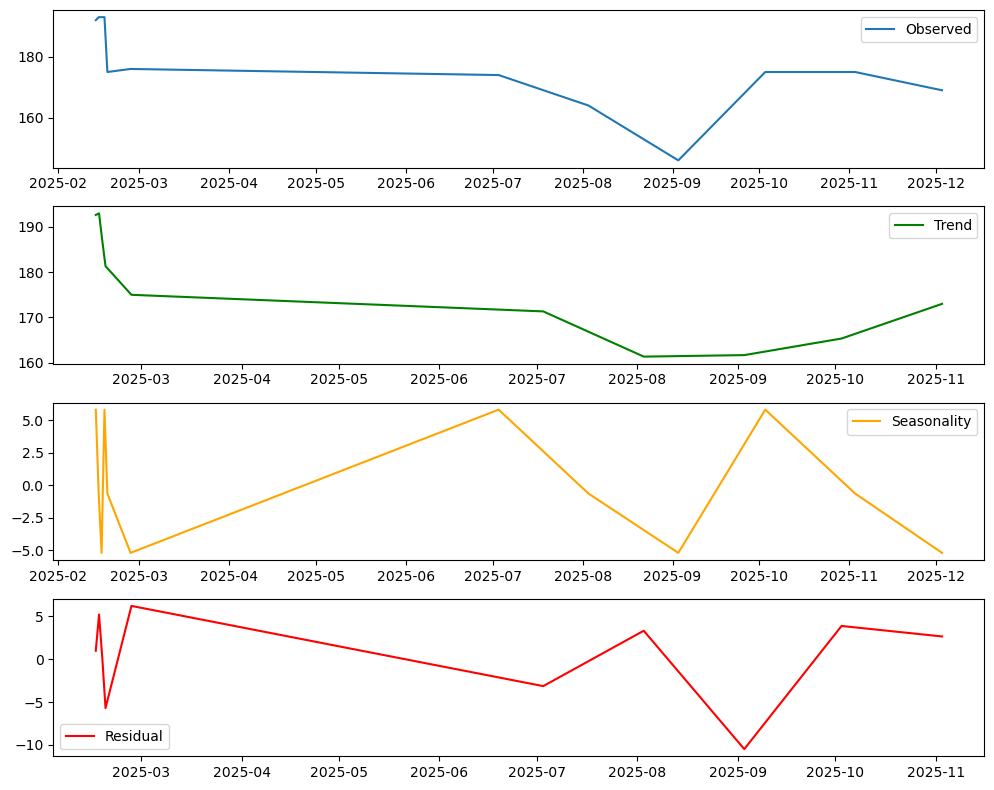

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Select a single location for decomposition (e.g., "Shahdara")
location_data = df_clean[df_clean["Location"] == "Shahdara"].set_index("Date")

# Perform seasonal decomposition
decomposition = seasonal_decompose(location_data["AQI"], model="additive", period=3)  # Assuming a periodic pattern every 3 data points

# Plot decomposition results
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label="Observed")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label="Trend", color="green")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label="Seasonality", color="orange")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label="Residual", color="red")
plt.legend()

plt.tight_layout()
plt.show()


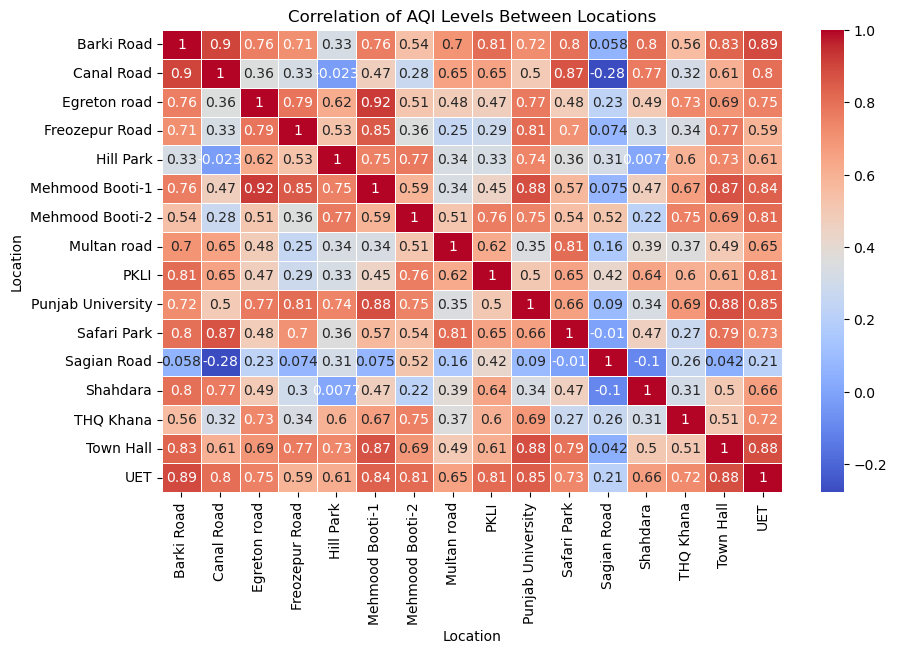

In [7]:
# Pivot the dataset to have locations as columns and dates as index
df_pivot = df_clean.pivot(index="Date", columns="Location", values="AQI")

# Compute correlation matrix
correlation_matrix = df_pivot.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Title
plt.title("Correlation of AQI Levels Between Locations")

# Show plot
plt.show()


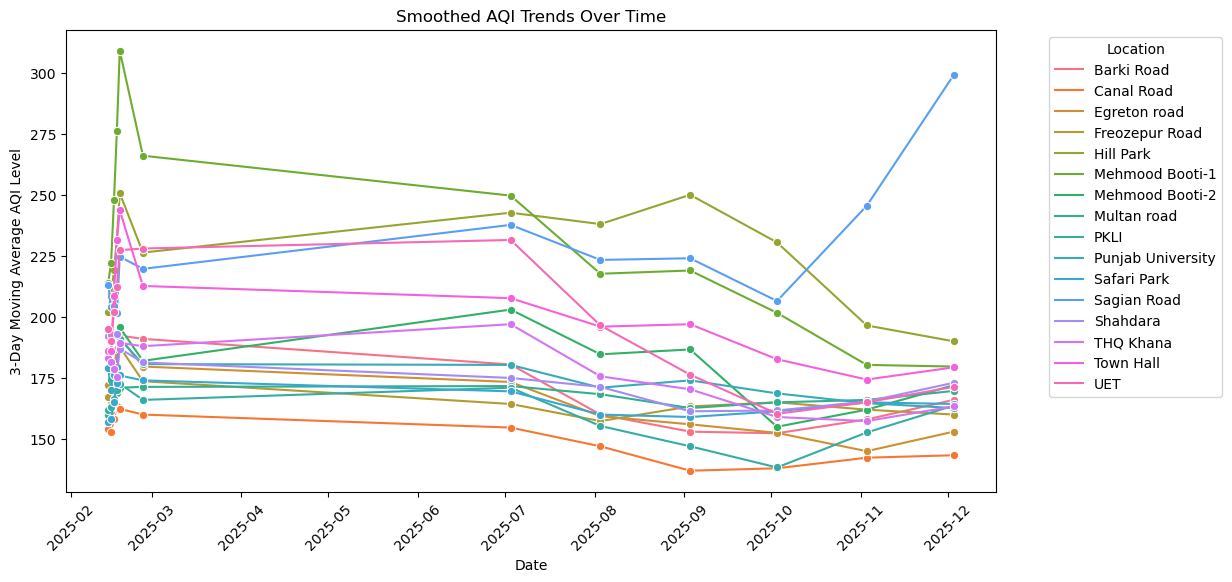

In [8]:
# Calculate 3-day moving average for smoothing
df_clean["AQI_MA3"] = df_clean.groupby("Location")["AQI"].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Plot smoothed AQI trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_clean, x="Date", y="AQI_MA3", hue="Location", marker="o")

# Labels and title
plt.xlabel("Date")
plt.ylabel("3-Day Moving Average AQI Level")
plt.title("Smoothed AQI Trends Over Time")
plt.xticks(rotation=45)
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()


C:\Users\Saira Alvi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Saira Alvi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Saira Alvi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Saira Alvi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a m

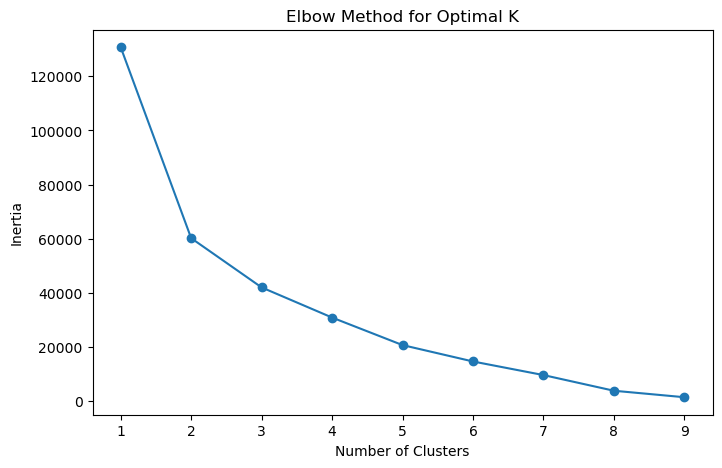

In [9]:
from sklearn.cluster import KMeans
import numpy as np

# Define AQI categories based on the EPA Punjab limits
def categorize_aqi(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 150:
        return "Moderate"
    elif aqi <= 200:
        return "Unhealthy (Sensitive)"
    elif aqi <= 300:
        return "Unhealthy"
    elif aqi <= 400:
        return "Very Unhealthy"
    else:
        return "Hazardous"

# Apply categorization
df_clean["AQI_Category"] = df_clean["AQI"].apply(categorize_aqi)

# Pivot data to have locations as features for clustering
df_pivot_cluster = df_clean.pivot(index="Date", columns="Location", values="AQI").fillna(method='ffill').fillna(method='bfill')

# Use Elbow method to determine optimal clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pivot_cluster)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


C:\Users\Saira Alvi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


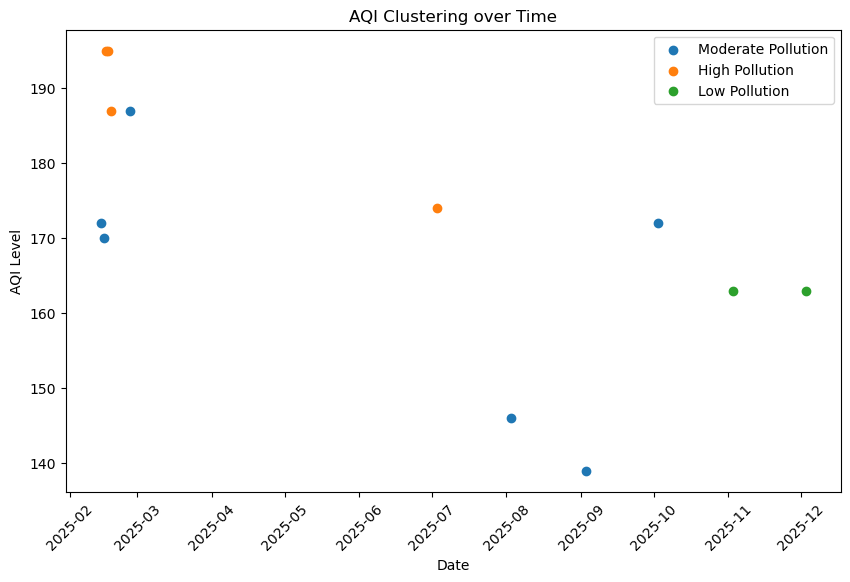

Location,Barki Road,Canal Road,Egreton road,Freozepur Road,Hill Park,Mehmood Booti-1,Mehmood Booti-2,Multan road,PKLI,Punjab University,Safari Park,Sagian Road,Shahdara,THQ Khana,Town Hall,UET,Cluster,Cluster_Label
Date,,,,,,,,,,,,,,,,,,
2025-02-14,172.0,154.0,172.0,167.0,202.0,214.0,183.0,160.0,162.0,179.0,157.0,213.0,192.0,183.0,186.0,195.0,1,Moderate Pollution
2025-02-15,170.0,152.0,165.0,156.0,215.0,230.0,165.0,165.0,164.0,161.0,159.0,195.0,193.0,180.0,186.0,185.0,1,Moderate Pollution
2025-02-16,195.0,169.0,183.0,188.0,240.0,299.0,187.0,171.0,173.0,189.0,180.0,205.0,193.0,173.0,254.0,226.0,2,High Pollution
2025-02-17,195.0,169.0,182.0,188.0,240.0,299.0,187.0,171.0,173.0,189.0,180.0,205.0,193.0,173.0,254.0,226.0,2,High Pollution
2025-02-18,187.0,149.0,210.0,187.0,272.0,329.0,213.0,171.0,172.0,195.0,168.0,264.0,175.0,222.0,223.0,230.0,2,High Pollution


In [10]:
# Apply K-Means clustering with the optimal number of clusters (k=3 or k=4)
optimal_k = 3  # Based on the Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_pivot_cluster["Cluster"] = kmeans.fit_predict(df_pivot_cluster)

# Assign cluster labels to the AQI categories
cluster_labels = {
    0: "Low Pollution",
    1: "Moderate Pollution",
    2: "High Pollution"
}

df_pivot_cluster["Cluster_Label"] = df_pivot_cluster["Cluster"].map(cluster_labels)

# Visualizing Clusters
plt.figure(figsize=(10, 6))
for cluster in df_pivot_cluster["Cluster"].unique():
    cluster_data = df_pivot_cluster[df_pivot_cluster["Cluster"] == cluster]
    plt.scatter(cluster_data.index, cluster_data.iloc[:, 0], label=cluster_labels[cluster])

plt.xlabel("Date")
plt.ylabel("AQI Level")
plt.title("AQI Clustering over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Display the first few rows of the clustered data
df_pivot_cluster.head()


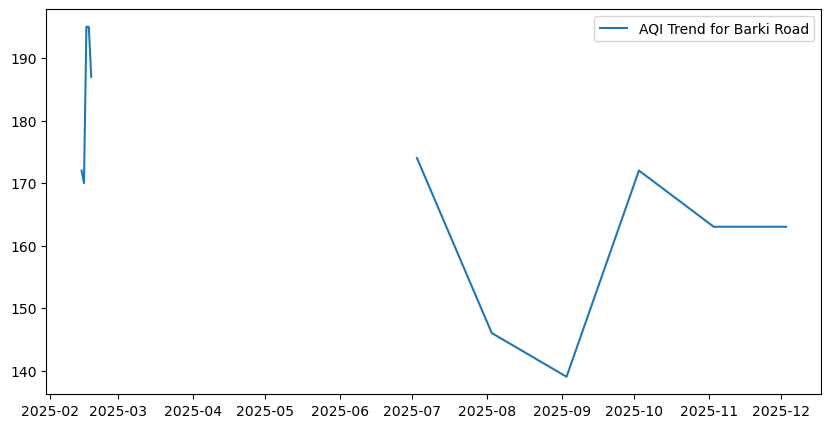

In [15]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Set Date as index
df_clean.set_index('Date', inplace=True)

# Select a specific location for forecasting (e.g., first location)
location = df_clean['Location'].unique()[0]
data = df_clean[df_clean['Location'] == location]['AQI']

# Plot AQI trends
plt.figure(figsize=(10, 5))
plt.plot(data, label=f"AQI Trend for {location}")
plt.legend()
plt.show()

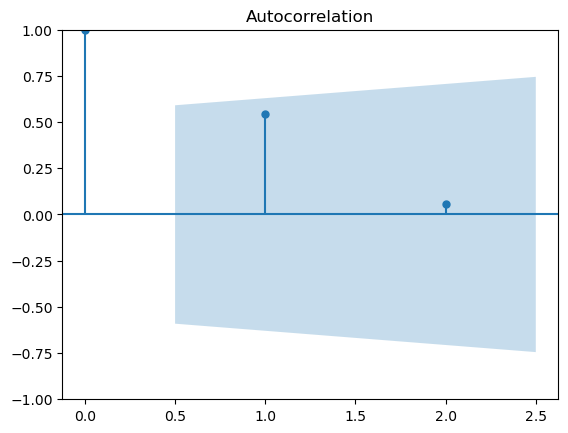

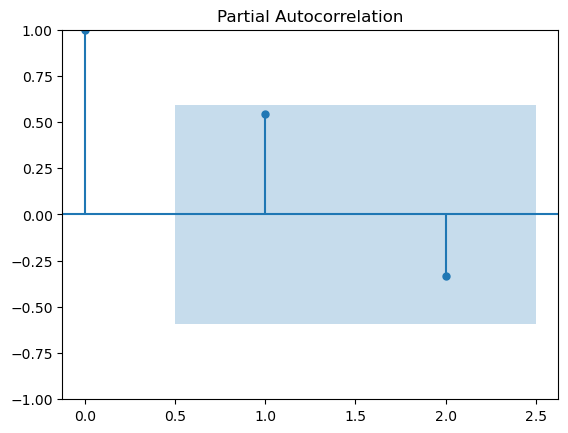

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF to determine AR and MA terms
plot_acf(data.dropna(), lags=2)
plot_pacf(data.dropna(), lags=2)
plt.show()


In [18]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data.dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] > 0.05:
    print("Data is non-stationary. Differencing needed.")
else:
    print("Data is stationary. No differencing needed.")


ADF Statistic: -1.4956092176249844
p-value: 0.5356822671513993
Data is non-stationary. Differencing needed.


In [21]:
data_diff1 = data.diff().dropna()  # First difference (d=1)
data_diff2 = data.diff().diff().diff().dropna()  # Second difference (d=2)

result = adfuller(data_diff2)  # Use data_diff2 if d=2 is needed
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] < 0.05:
    print("Data is stationary. Use d=1.")
else:
    print("Still non-stationary. Consider d=2.")

ADF Statistic: -3.1638744033231165
p-value: 0.022173333979894343
Data is stationary. Use d=1.


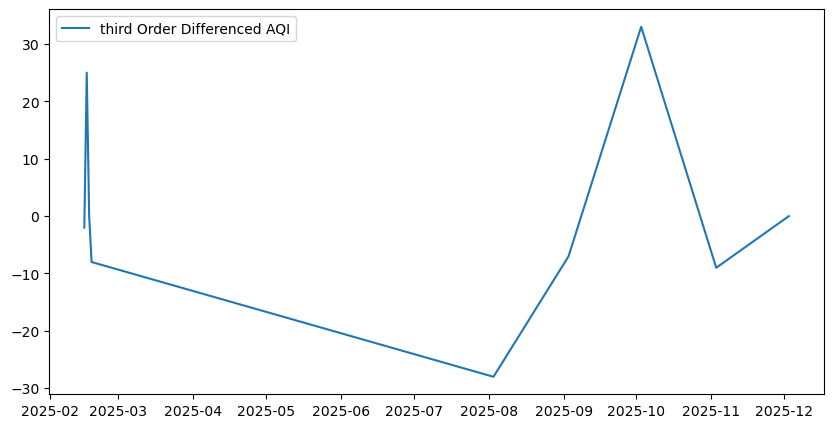

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(data_diff1, label="third Order Differenced AQI")
plt.legend()
plt.show()

In [24]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(1,1,1))  # d=1 because first differencing was enough
arima_result = model.fit()
print(arima_result.summary())


C:\Users\Saira Alvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Saira Alvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Saira Alvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Saira Alvi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starti

                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -41.981
Date:                Tue, 25 Mar 2025   AIC                             89.962
Time:                        23:22:06   BIC                             91.156
Sample:                             0   HQIC                            89.210
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6251      1.399      0.447      0.655      -2.117       3.368
ma.L1         -0.9995    354.761     -0.003      0.998    -696.318     694.319
sigma2       221.4419   7.84e+04      0.003      0.9

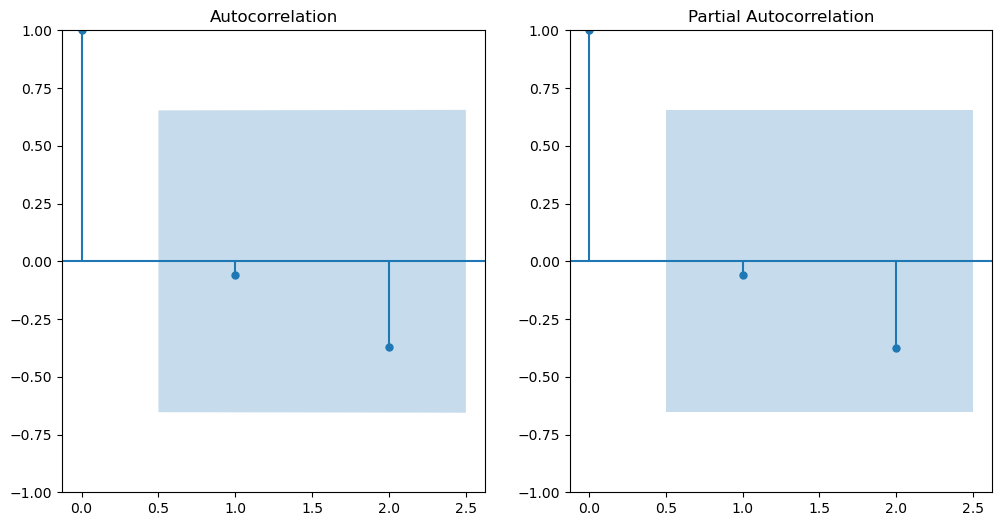

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(data.diff().dropna(), lags=2, ax=plt.gca())  # ACF for q
plt.subplot(122)
plot_pacf(data.diff().dropna(), lags=2, ax=plt.gca())  # PACF for p
plt.show()


In [27]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")

# Define range for p, d, q
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)

best_aic = float("inf")
best_order = None
best_model = None

# Try different combinations of p, d, q
for pdq in itertools.product(p, d, q):
    try:
        model = ARIMA(data, order=pdq)
        result = model.fit()
        if result.aic < best_aic:
            best_aic = result.aic
            best_order = pdq
            best_model = result
    except:
        continue

print(f"Best ARIMA order: {best_order}, AIC: {best_aic}")


Best ARIMA order: (0, 1, 0), AIC: 87.34992739094028


In [28]:
best_p, best_d, best_q = best_order
model = ARIMA(data, order=(best_p, best_d, best_q))
arima_result = model.fit()
print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                   12
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -42.675
Date:                Tue, 25 Mar 2025   AIC                             87.350
Time:                        23:24:05   BIC                             87.748
Sample:                             0   HQIC                            87.099
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       278.0376    128.918      2.157      0.031      25.364     530.712
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.86   Pr

In [29]:
forecast = arima_result.forecast(steps=7)  # Forecast next 7 days
print(forecast)


12    163.0
13    163.0
14    163.0
15    163.0
16    163.0
17    163.0
18    163.0
Name: predicted_mean, dtype: float64


In [33]:
pip install folium


  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/81/4d/bcbee0676dc06f0b014a030cb928e158c96daafb872a01ddee7e60a8c998/folium-0.19.5-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/f8/9d/91cddd38bd00170aad1a4b198c47b4ed716be45c234e09b835af41f4e717/branca-0.8.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.9 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/110.9 kB 262.6 kB/s eta 0:00:01
   -------------- ------------------------ 41.0/110.9 kB 217.9 kB/s eta 0:00:01
   --------------------- ----------------- 61.4/110.9 kB 273.8 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/110.9 kB 368.6 kB/s 

In [34]:
pip install geopy


  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/9f/5a/a26132406f1f40cf51ea349a5f11b0a46cec02a2031ff82e391c2537247a/geographiclib-2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --------- ----------------------------- 30.7/125.4 kB 330.3 kB/s eta 0:00:01
   ------------ -------------------------- 41.0/125.4 kB 245.8 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/125.4 kB 403.5 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 460.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 

In [35]:
from geopy.geocoders import Nominatim
import pandas as pd

# Initialize geocoder
geolocator = Nominatim(user_agent="aqi_analysis")

# Function to get coordinates
def get_lat_lon(location):
    try:
        loc = geolocator.geocode(location, timeout=10)
        if loc:
            return pd.Series([loc.latitude, loc.longitude])
    except:
        return pd.Series([None, None])
    return pd.Series([None, None])

# Get unique locations from dataset
unique_locations = df_clean["Location"].unique()
location_df = pd.DataFrame(unique_locations, columns=["Location"])

# Apply function to get latitude and longitude
location_df[['Latitude', 'Longitude']] = location_df["Location"].apply(get_lat_lon)

# Merge coordinates back to the original AQI dataset
df_clean = df_clean.merge(location_df, on="Location", how="left")

# Drop rows where location couldn't be found
df_clean = df_clean.dropna(subset=["Latitude", "Longitude"])

# Display updated dataset
print(df_clean.head())


            Location  14/2/2025  15/2/2025  16/2/2025  17/2/2025  18/2/2025  \
0           Shahdara        192        193        193        193        175   
1          Town Hall        186        186        254        254        223   
3  Punjab University        179        161        189        189        195   
4         Canal Road        154        152        169        169        149   
5        Safari Park        157        159        180        180        168   

   26/2/2025  2025-07-03 00:00:00  2025-08-03 00:00:00  2025-09-03 00:00:00  \
0      176.0                  174                  164                  146   
1      161.0                  239                  188                  164   
3      158.0                  188                  167                  167   
4      162.0                  153                  126                  132   
5        NaN                  171                  149                  157   

   2025-10-03 00:00:00  2025-11-03 00:00:00  2025-

In [36]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize Data for Clustering
scaler = StandardScaler()
clustering_data = scaler.fit_transform(df_clean[['Latitude', 'Longitude', 'AQI']])

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_clean["Cluster"] = dbscan.fit_predict(clustering_data)

# Plot Clusters on Map
plt.figure(figsize=(10, 6))
plt.scatter(df_clean["Longitude"], df_clean["Latitude"], c=df_clean["Cluster"], cmap="viridis", marker="o")
plt.colorbar(label="Cluster Label")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("DBSCAN Clustering of AQI Levels")
plt.show()


KeyError: "['AQI'] not in index"

In [38]:
import pandas as pd

# Reshape the dataset: Convert multiple date columns into rows with 'Date' and 'AQI'
df_clean = df_clean.melt(id_vars=["Location", "Latitude", "Longitude"], 
                    var_name="Date", value_name="AQI")

# Convert 'Date' column to datetime format
df_clean["Date"] = pd.to_datetime(df_clean["Date"], errors='coerce')

# Drop NaN values (if any)
df_clean = df_clean.dropna(subset=["AQI"])

# Display the cleaned dataset
print(df_clean.head())


            Location   Latitude  Longitude       Date    AQI
0           Shahdara  28.675866  77.298508 2025-02-14  192.0
1          Town Hall  42.907433  -2.064592 2025-02-14  186.0
2  Punjab University  31.569937  74.308947 2025-02-14  179.0
3         Canal Road  24.728303  67.692360 2025-02-14  154.0
4        Safari Park  45.639852   8.614799 2025-02-14  157.0


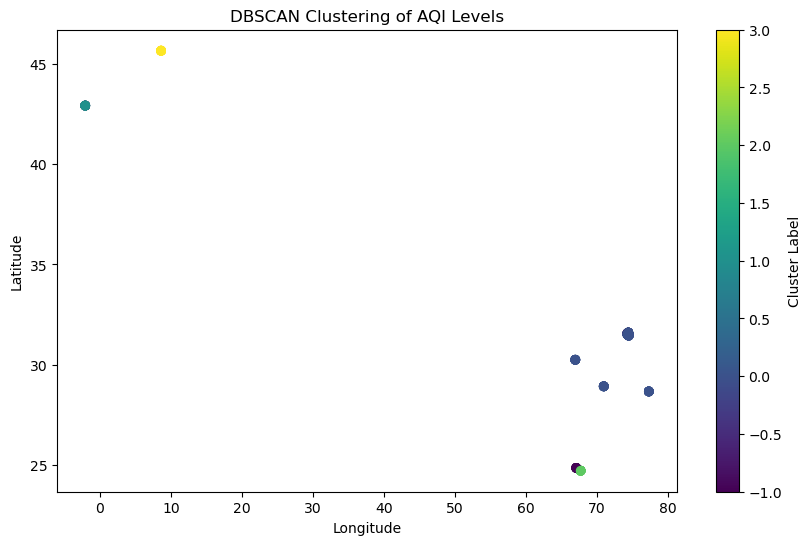

In [39]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize data
scaler = StandardScaler()
clustering_data = scaler.fit_transform(df_clean[['Latitude', 'Longitude', 'AQI']])

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_clean["Cluster"] = dbscan.fit_predict(clustering_data)

# Plot Clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_clean["Longitude"], df_clean["Latitude"], c=df_clean["Cluster"], cmap="viridis", marker="o")
plt.colorbar(label="Cluster Label")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("DBSCAN Clustering of AQI Levels")
plt.show()


In [40]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered around the average location
m = folium.Map(location=[df_clean["Latitude"].mean(), df_clean["Longitude"].mean()], zoom_start=10)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Add locations to the map
for _, row in df_clean.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=f"Location: {row['Location']}<br>AQI: {row['AQI']}<br>Cluster: {row['Cluster']}",
        icon=folium.Icon(color="blue" if row["Cluster"] != -1 else "red")  # Red for noise points
    ).add_to(marker_cluster)

# Save the map to an HTML file
m.save("AQI_Clusters_Map.html")
m


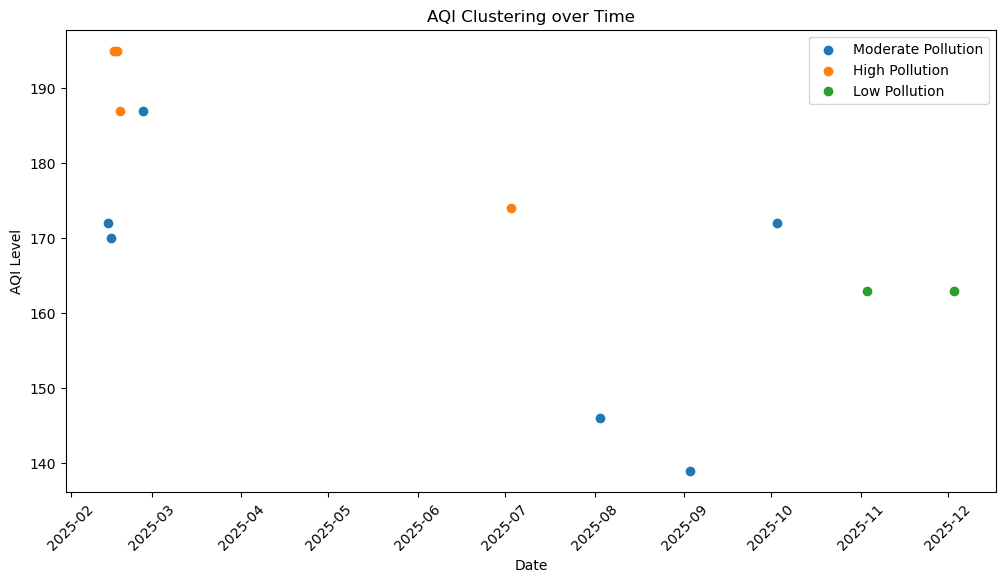

In [41]:
from sklearn.cluster import KMeans

# Pivot DataFrame to have 'Date' as index and Locations as columns
df_pivot = df_clean.pivot(index="Date", columns="Location", values="AQI").fillna(method="ffill")

# Apply K-Means clustering (choose k based on Elbow method)
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_pivot["Cluster"] = kmeans.fit_predict(df_pivot)

# Assign cluster labels to AQI categories
cluster_labels = {0: "Low Pollution", 1: "Moderate Pollution", 2: "High Pollution"}
df_pivot["Cluster_Label"] = df_pivot["Cluster"].map(cluster_labels)

# Plot AQI Clusters over Time
plt.figure(figsize=(12, 6))
for cluster in df_pivot["Cluster"].unique():
    cluster_data = df_pivot[df_pivot["Cluster"] == cluster]
    plt.scatter(cluster_data.index, cluster_data.iloc[:, 0], label=cluster_labels[cluster])

plt.xlabel("Date")
plt.ylabel("AQI Level")
plt.title("AQI Clustering over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()
